# Example: Centroid Vetting.
### How to look for centroid offset between in and out of transit

In [1]:
import numpy
import matplotlib
import exovetter as exo
from exovetter import const
from exovetter import utils
import exovetter.vetters as vet
import lightkurve as lk

In [2]:
candidate = "TOI 1013.01"

In [3]:
tce = utils.get_mast_tce(candidate)
tce

[{'period': <Quantity 5.425555 d>,
  'epoch': <Quantity 58493.86798 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.01493963>,
  'duration': <Quantity 0.15745833 d>,
  'target': 'TOI 1013.01'}]

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

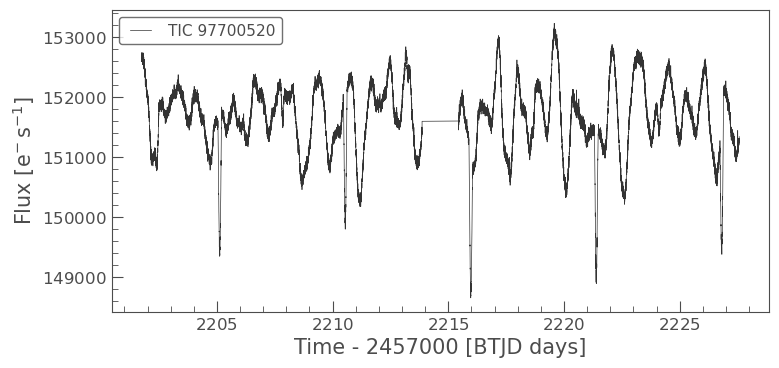

In [4]:
lc = lk.search_lightcurve(candidate, sector=33, exptime=120).download()
lc.plot()

[131. 132. 133. 134. 135.]
6
[130. 130. 130. ... 135. 135. 135.]


{'num_transits': 5}

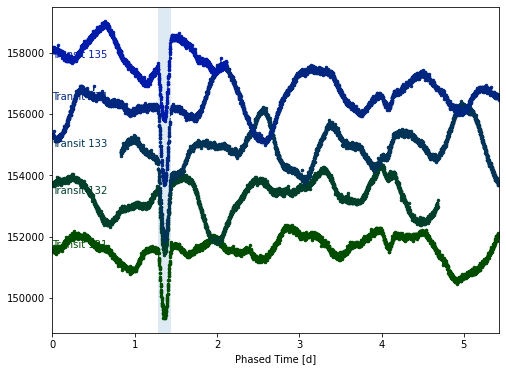

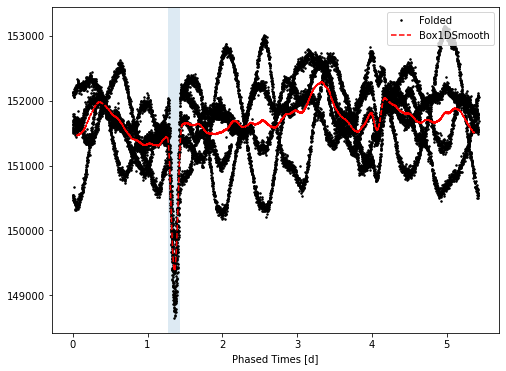

In [5]:
viz = vet.VizTransits()
viz.run(tce[0], lc, plot=True)

{'offset': 0.021920767844219733, 'significance': array([0.43030206])}

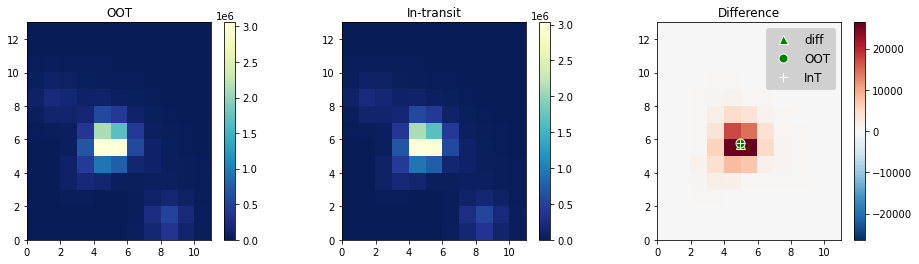

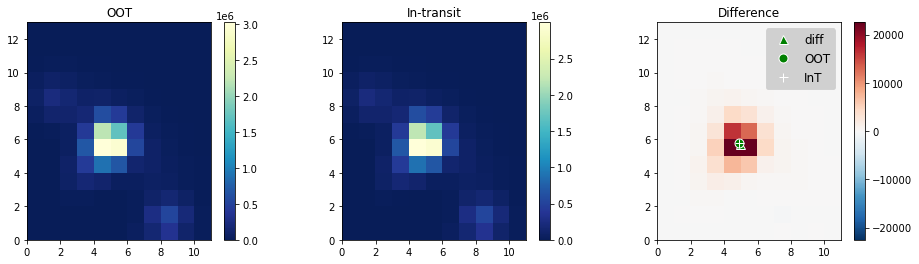

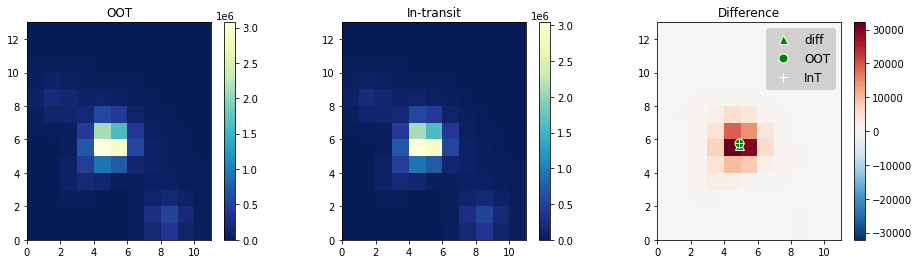

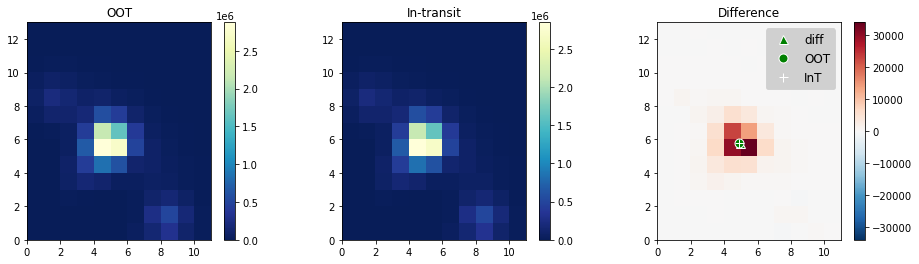

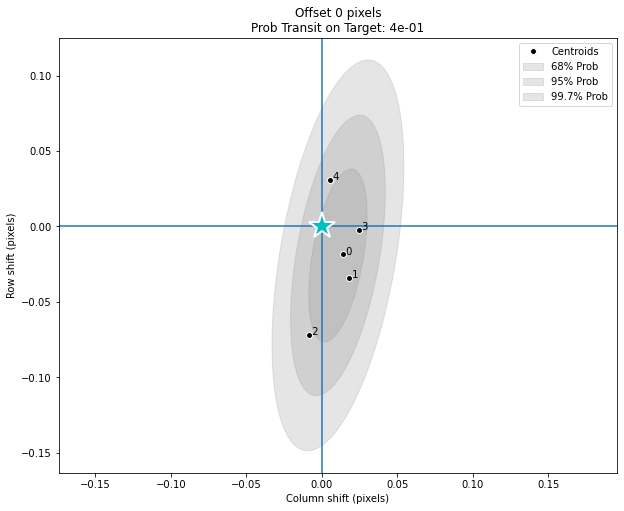

In [6]:
%matplotlib inline
tpf = lk.search_targetpixelfile(candidate, sector=33, exptime=120).download()
cent = vet.Centroid()
cent.run(tce[0],tpf, plot=True)

In [11]:
candidate = "TOI 412.01"
tce = utils.get_mast_tce(candidate)
tce

[{'period': <Quantity 1.109738 d>,
  'epoch': <Quantity 58411.315795 d>,
  'epoch_offset': <Quantity -2400000.5 d>,
  'depth': <Quantity 0.00068>,
  'duration': <Quantity 0.04580454 d>,
  'target': 'TOI 412.01'}]

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

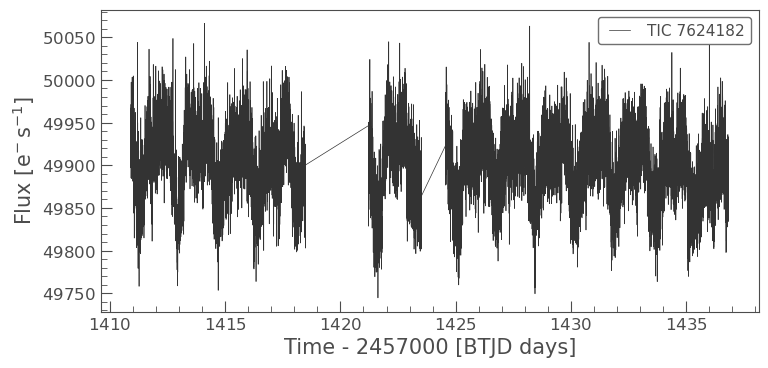

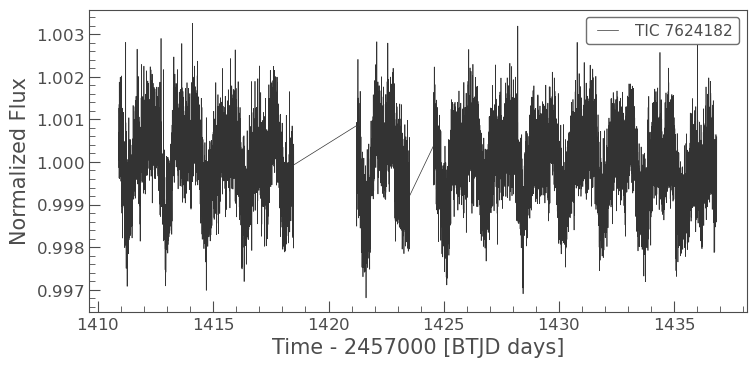

In [12]:
lc = lk.search_lightcurve(candidate)[0].download()
lc.plot()
cleanlc = lc.remove_outliers().normalize()
cleanlc.plot()

[ 0.  1.  2.  3.  4.  5.  6.  9. 10. 12.]
10
[-1. -1. -1. ... 22. 22. 22.]


{'num_transits': 20}

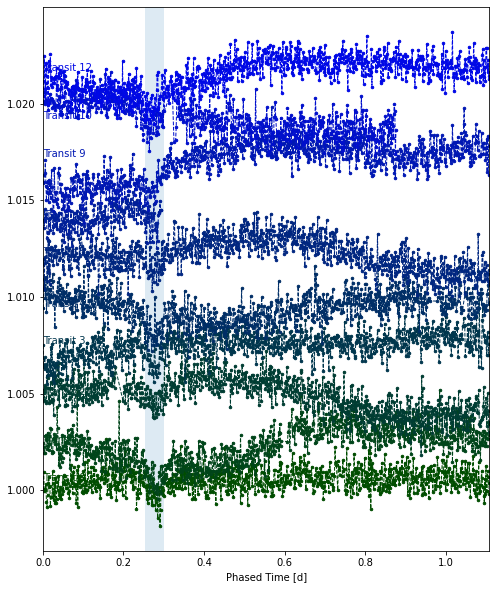

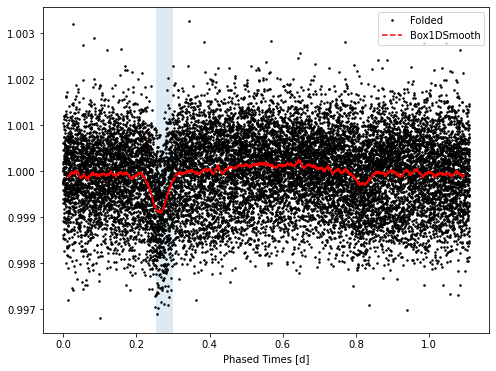

In [14]:
viz = vet.VizTransits()
viz.run(tce[0],cleanlc, plot=True)

{'offset': 0.32281893993924354, 'significance': array([0.84885119])}

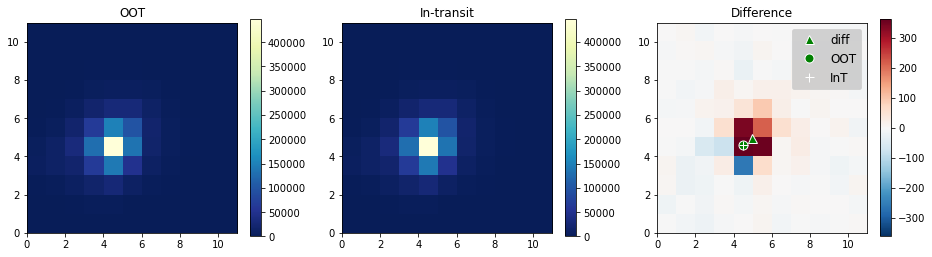

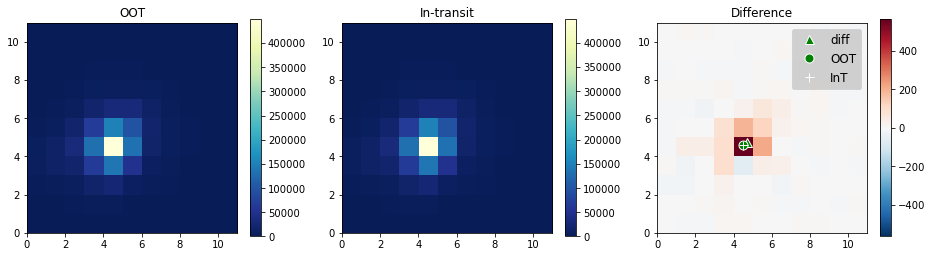

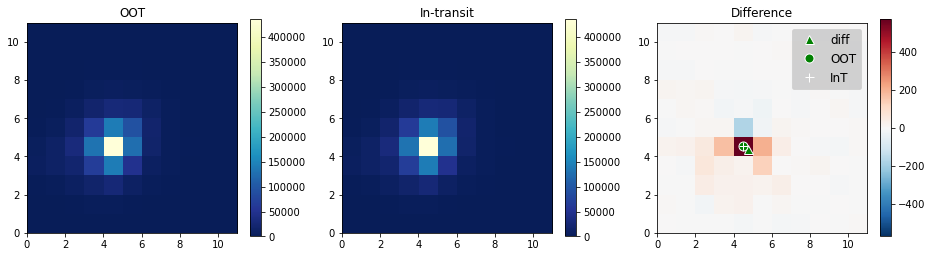

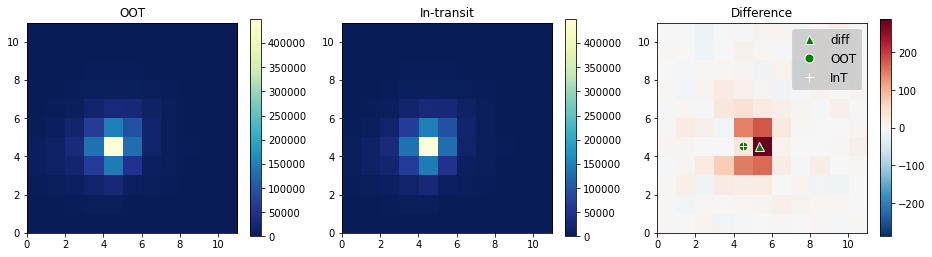

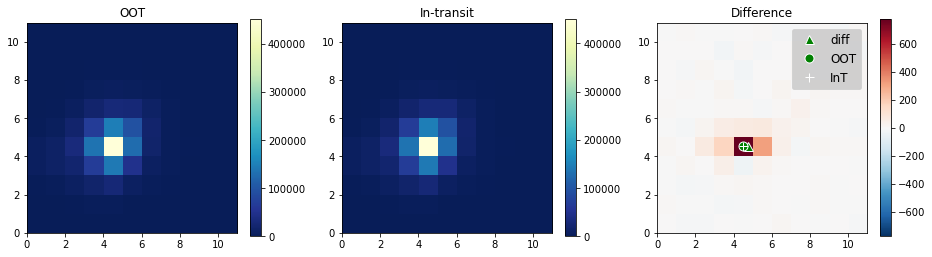

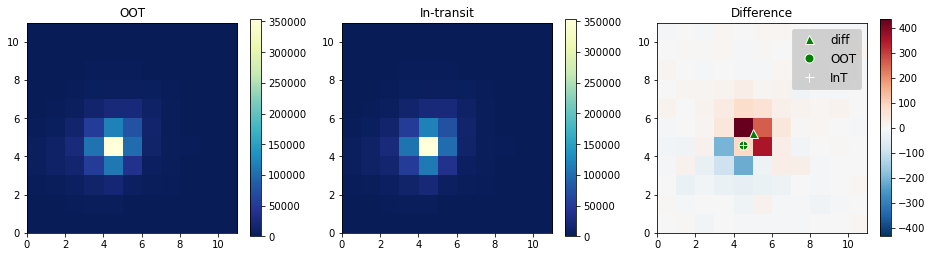

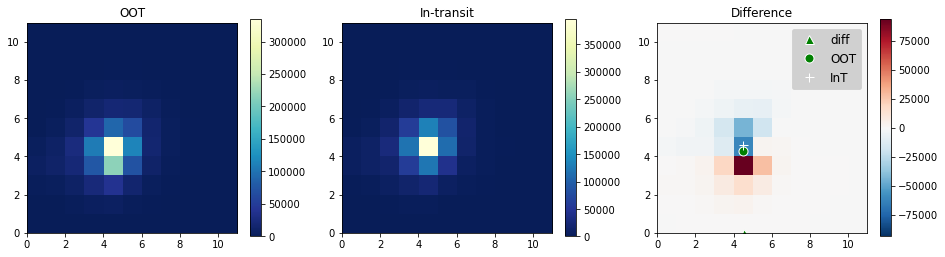

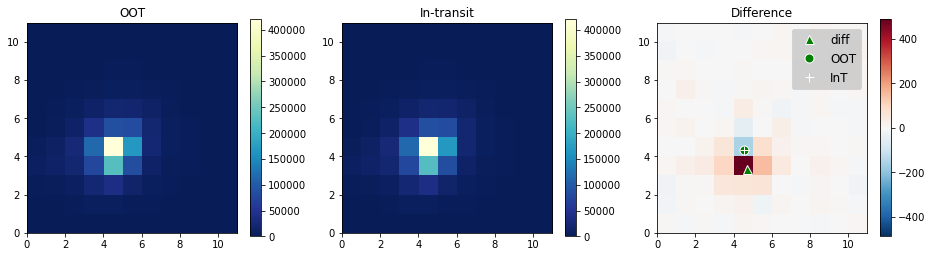

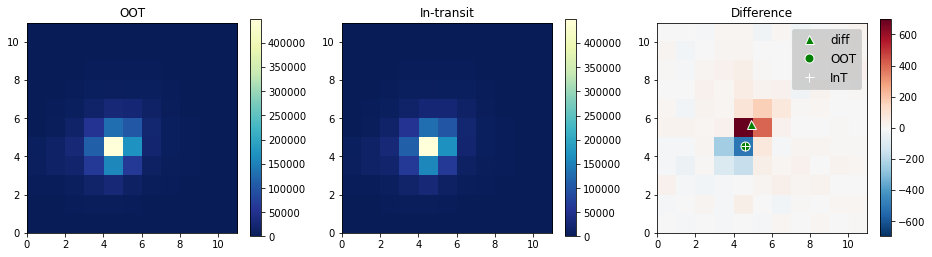

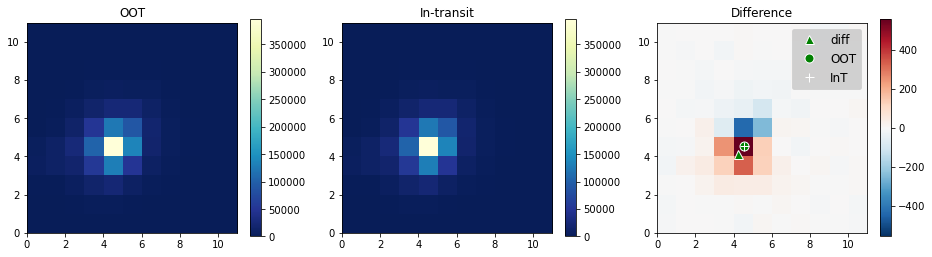

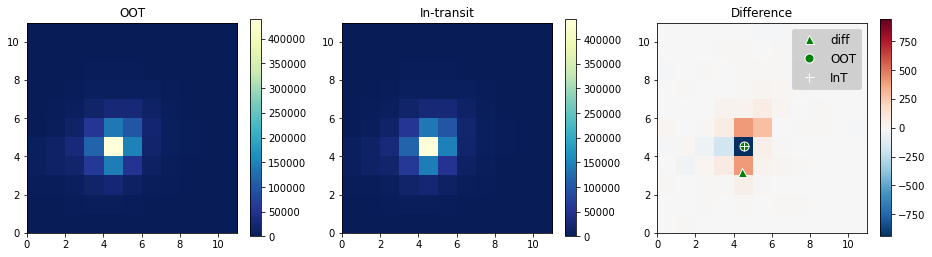

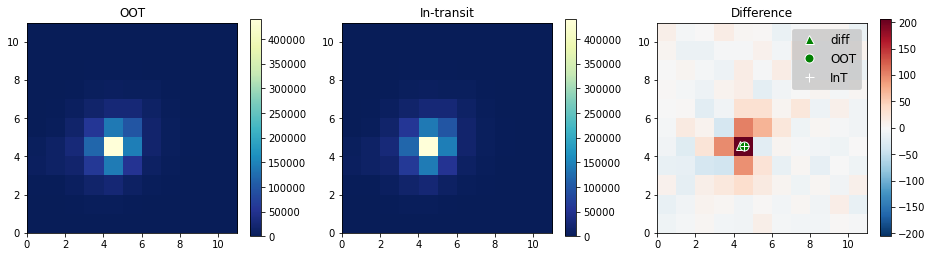

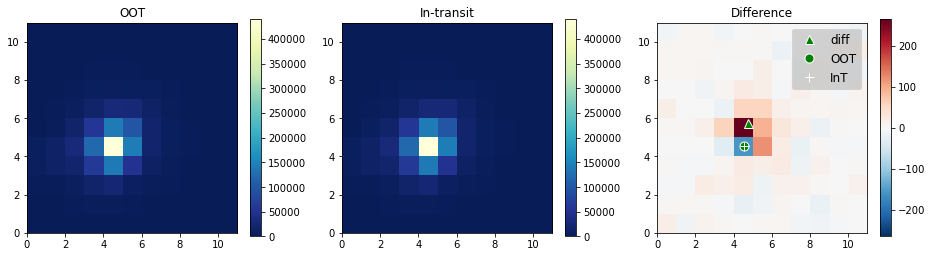

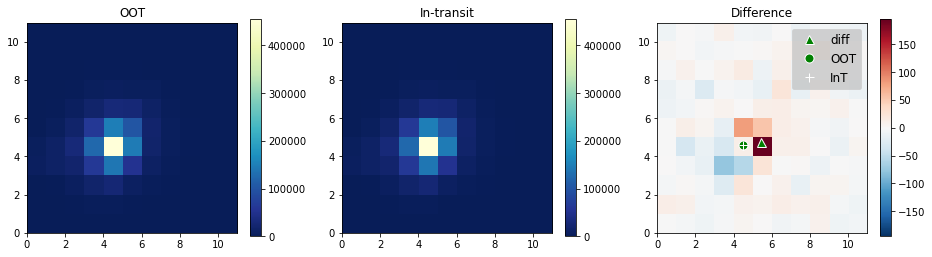

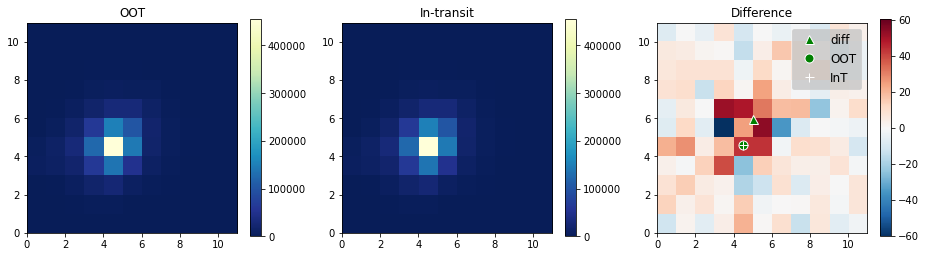

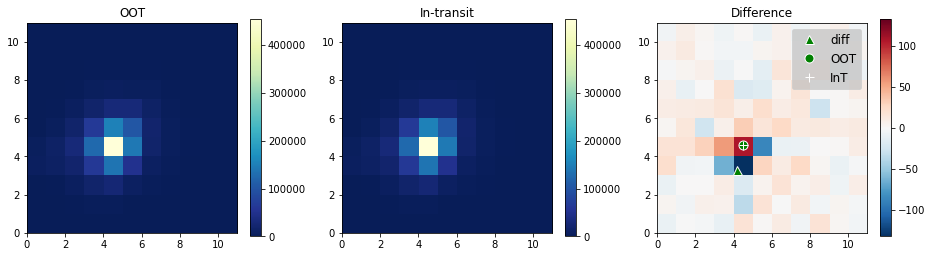

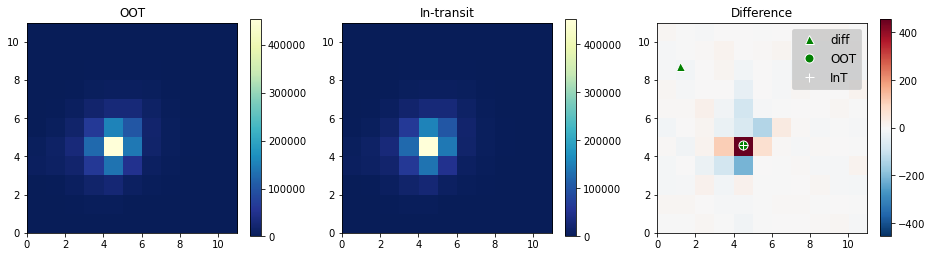

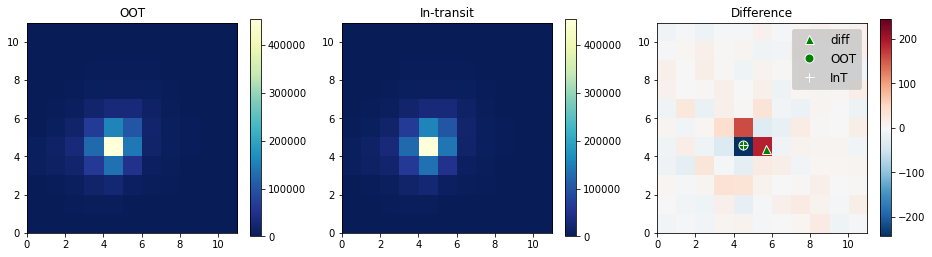

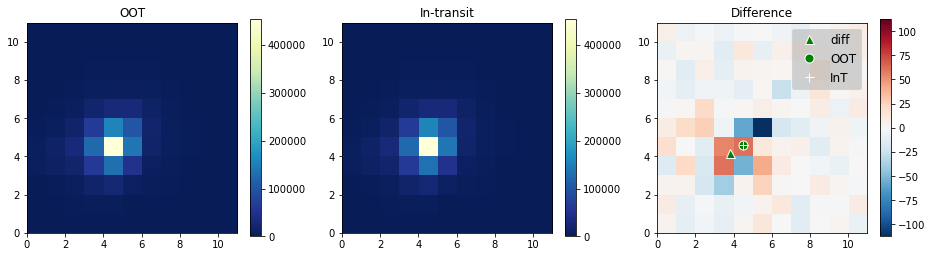

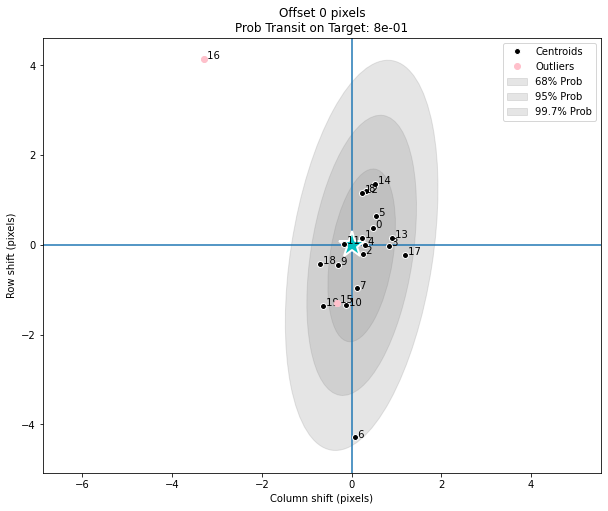

In [15]:
tpf = lk.search_targetpixelfile(candidate)[0].download()
cent = vet.Centroid()
cent.run(tce[0],tpf,plot=True)